In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
train_data = np.load("Lorenz-63/Data/training_data_N100000.npy", allow_pickle=True)
train_data = train_data.tolist()
train_data

{'train_input_sequence': array([[-0.69198763, -0.65270066, -0.05103939],
        [-0.72238106, -0.68127614, -0.0846943 ],
        [-0.7230648 , -0.7182984 , -0.10404835],
        ...,
        [ 0.5513961 ,  0.7594797 , -1.0428592 ],
        [ 0.5790394 ,  0.8150572 , -1.0467466 ],
        [ 0.6037306 ,  0.891086  , -1.0602969 ]], dtype=float32),
 'dt': 1}

In [94]:
train_sequence = train_data["train_input_sequence"]
print(np.shape(train_sequence))

(100000, 3)


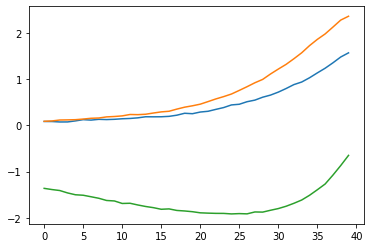

In [103]:
plt.plot(train_sequence[980:1020])

In [11]:
test_data = np.load("Lorenz-63/Data/testing_data_N100000.npy", allow_pickle=True)
test_data = test_data.tolist()
test_data

{'test_input_sequence': array([[ 0.8411185 ,  1.1025305 , -0.6285343 ],
        [ 0.8837852 ,  1.1630983 , -0.6088059 ],
        [ 0.9290491 ,  1.2252774 , -0.5812297 ],
        ...,
        [ 1.5641849 ,  2.0126762 ,  0.06439964],
        [ 1.6350138 ,  2.0357478 ,  0.24744317],
        [ 1.7004675 ,  2.0372643 ,  0.43857047]], dtype=float32),
 'testing_ic_indexes': array([33278, 45336, 75426, ..., 70171, 78727, 27555]),
 'dt': 1}

In [22]:
test_sequence = test_data["test_input_sequence"]
print(np.shape(test_sequence))
test_ic_indexes = test_data["testing_ic_indexes"]
print(np.shape(test_ic_indexes))

(100000, 3)
(60000,)


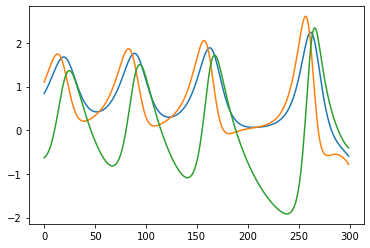

In [19]:
plt.plot(test_sequence[:300])

# Task 2 data for testing the metric ...

Data already generated in /Data/Test-Task02/Data

In [96]:
N_data = 100000 # number of series points
dt = 0.5 # time step size
A = 2 # Amplitude
freq = 0.1 # Frequency
phi0 = 0 # Phase Offset for training data
phi0_test = 0.5 # -||- for testing data
c = 0.5 # Offset

t = np.arange(0, N_data, dt)
training_data = A*np.sin(2*np.pi*freq*t+phi0)+c
# adding a dimension (get same shape as Lorenz-Datasets)
training_data = training_data[:,None]

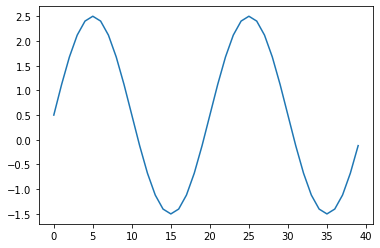

In [98]:
plt.plot(training_data[:40])
plt.show()

In [101]:
testing_data = A*np.sin(2*np.pi*freq*t+phi0_test)+c
# adding a dimension (get same shape as Lorenz-Datasets)
testing_data = testing_data[:,None]

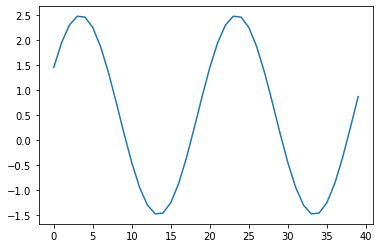

In [100]:
plt.plot(testing_data[:40])
plt.show()

## Debugging of memory error 

In [83]:
def addNoise(data, percent):
    print("shape", np.shape(data))
    std_data = np.std(data, axis=0)
    std_data = np.reshape(std_data, (1, -1))
    std_data = np.repeat(std_data, np.shape(data)[0], axis=0)
    noise = np.multiply(np.random.randn(*np.shape(data)), percent/1000.0*std_data)
    data += noise
    return data

Adding noise to the training data. 1 per mille 
shape (200000,)


MemoryError: Unable to allocate 298. GiB for an array with shape (200000, 200000) and data type float64

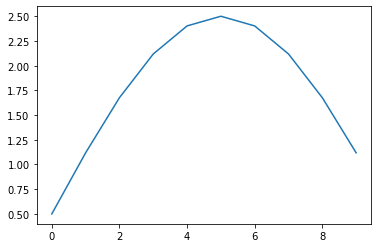

In [86]:
noise_level = 1

with open("Test-Task02/Data/training_data_N100000.npy", "rb") as file:
    raw_data = np.load(file, allow_pickle=True)
    data = raw_data.ravel()[0]
    input_sequence = data["train_input_sequence"]
    plt.plot(input_sequence[:10])
    print("Adding noise to the training data. {:} per mille ".format(noise_level))
    input_sequence = addNoise(input_sequence, noise_level)

In [85]:
with open("Lorenz-63/Data/training_data_N100000.npy", "rb") as file:
    raw_data = np.load(file, allow_pickle=True)
    data = raw_data.ravel()[0]
    input_sequence = data["train_input_sequence"]
    print("Adding noise to the training data. {:} per mille ".format(noise_level))
    input_sequence = addNoise(input_sequence, noise_level)

Adding noise to the training data. 1 per mille 
shape (100000, 3)


In [87]:
x = np.arange(10)

In [91]:
x.shape

(10, 1)

In [90]:
x = x[:, None]